In [226]:
import acquire, prepare
from env import github_token, github_username
import csv
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [83]:
plt.rc('figure', figsize=(14,8))
plt.rc('font', size=13)

In [2]:
# acquire.acquire_repo_list('petroleum')
# acquire.acquire_repo_list('solar energy')
# acquire.acquire_repo_list('natural gas')

In [3]:
# df = acquire.scrape_github_data()

In [4]:
# len(df)

In [5]:
# full_list = []
# for file in os.listdir():
#     if 'repos.json' in file:
#         full_list.append(file)
# item_list = []
# for item in full_list:
#     lm = pd.read_json(item)
#     item_list += (list(lm[0]))
# REPOS = item_list
# len(REPOS)

In [6]:
# REPOS

In [7]:
# frame = [acquire.process_repo(repo) for repo in REPOS]

In [8]:
# len(frame)

In [9]:
# frame

In [10]:
# pd.DataFrame(frame).to_csv('all_repos_dict.csv', index=False)

In [11]:
# pd.read_json('data.json')

In [12]:
# url = 'https://github.com/search?o=desc&p=1&q=petroleum&s=stars&type=Repositories'
# headers = {'User-Agent': 'manual search'} 
# response = get(url, headers=headers)
# # print(response.status_code)
# soup = BeautifulSoup(response.content, 'html.parser')

In [13]:
# soup.find_all('a', class_='v-align-middle')[0].text

In [14]:
# def get_repo_names(url):
#     headers = {'User-Agent': 'manual search'} 
#     response = get(url, headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     repos = []
#     for i in range(10):
#         repos.append(soup.find_all('a', class_='v-align-middle')\
#                  [i].text)
#         time.sleep(.8)
#     return repos

In [15]:
# url = 'https://github.com/search?o=desc&p=1&q=petroleum&s=stars&type=Repositories'
# get_repo_names(url)

In [16]:
# urls = [f'https://github.com/search?o=desc&p={i}\
# &q=petroleum+size%3A>100&s=stars&type=Repositories' \
# for i in range(1,11)]
# urls[0]

In [17]:
# if not os.path.isfile(f'{category}.json'):
#     lol.to_csv('data.csv')
# data = pd.read_csv('data.csv', header=None, index_col=0,
#                   names=['number','repo'])

In [18]:
# def acquire_repo_list(category):
#     if (' ') in category:
#         category = category.replace(' ','_')
#         f_category = category.replace(' ','+')

#     urls = [f'https://github.com/search?o=desc&p={i}\
#     &q={f_category}+size:>100&s=stars&type=Repositories'\
#     for i in range(1,11)]

#     test = []
#     for url in urls:
#         test += get_repo_names(url)
        
#     if not os.path.isfile(f'{category}.json'):  
#         json.dump(test, open(f"{category}_repos.json", "w"),
#                   indent=1)
    
#     return test

In [19]:
# solar = acquire_repo_list('solar energy')

In [20]:
# len(solar)

In [21]:
# lm = pd.read_json('solar_energy_repo.json')
# list(lm[0])

In [22]:
# gas = acquire_repo_list('natural gas')

In [23]:
# len(gas)

In [24]:
# full_list = []
# for file in os.listdir():
#     if 'repo.json' in file:
#         full_list.append(file)
# full_list

In [25]:
# for i, item in enumerate(full_list):
#     locals()['lm'+str(i)] = pd.read_json(item)
# repo_list = []
# for i in range(len(full_list)):
#     repo_list.append(list('lm'+str(i))[0])
# repo_list

In [26]:
# item_list = []
# for item in full_list:
#     lm = pd.read_json(item)
#     item_list += (list(lm[0]))

In [27]:
# item_list

In [28]:
# lm = pd.read_json('natural_gas_repo.json')
# lm2 = pd.read_json('solar_energy_repo.json')
# len(list(lm[0]) + list(lm2[0]))

In [29]:
# test = []
# for url in urls:
#     test += get_repo_names(url)

# len(test)

In [30]:
# test

In [31]:
# lol = pd.Series(test)
# test[:6]

In [32]:
# if not os.path.isfile('data.csv'):
#     lol.to_csv('data.csv')
# data = pd.read_csv('data.csv', header=None, index_col=0,
#                   names=['number','repo'])

In [33]:
# data_list = list(data.repo)

In [34]:
# repo = 'gocodeup/codeup-setup-script'

In [35]:
# acquire.scrape_github_data()

In [36]:
# pd.read_json('solar_energy_repo.json')

In [37]:
df = pd.read_csv('all_repos_dict.csv')

df['category'] = 'unknown'

df.loc[:100, 'category'] = 'solar_energy'
df.loc[100:200, 'category'] = 'petroleum'
df.loc[200:, 'category'] = 'natural_gas'
df = df[['language','category','repo','readme_contents']]
df.head()

,language,category,repo,readme_contents
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...


In [38]:
df[df.readme_contents.isna()]

,language,category,repo,readme_contents
66,R,solar_energy,rockclimber112358/solar-energy-forecasting,NaN
182,Java,petroleum,Rakesh2017/PetroleumDriver,NaN
254,Python,natural_gas,guitar1999/gas_logging,NaN


In [39]:
df[df.language.isna()].category.value_counts()

natural_gas     12
petroleum        9
solar_energy     7
Name: category, dtype: int64

In [40]:
df = prepare.prep_repo_data(df)
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [41]:
df = df[df.index!=15]

In [42]:
df.clean_lemmatized.apply(len).nlargest(5)

16    16389
47    10445
72     7272
95     7017
8      6776
Name: clean_lemmatized, dtype: int64

In [43]:
df.shape

(213, 7)

In [44]:
df['word_count'] = df.clean_lemmatized.str.split().apply(len)

In [241]:
df = df.replace('Matlab','MATLAB')

In [270]:
low = df.language.value_counts() < 5

In [267]:
low_lang = [low.index[i] for i, x in enumerate(low) if x]

In [271]:
df = df[~df.language.isin(low_lang)]

In [289]:
# top_lang = list(df.language.value_counts().head(10).index)
# top_lang_df = df[df.language.isin(top_lang)]
top_4_lang = list(df.language.value_counts().head(4).index)
top_4_lang_df = df[df.language.isin(top_4_lang)]

In [290]:
top_4_lang_df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...,123
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...,410
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...,127
8,Python,solar_energy,sibyjackgrove/SolarPV-DER-simulation-utility,**Status:** Expect regular updates and bug fix...,"[status, expect, regular, updates, and, bug, f...",statu expect regular updat bug fix util simul ...,status expect regular update bug fix utility s...,596
9,Python,solar_energy,zygmuntz/kaggle-solar,kaggle-solar\n============\n\nSee [http://fast...,"[kagglesolar, see, httpfastmlcompredictingsola...",kagglesolar see httpfastmlcompredictingsolaren...,kagglesolar see httpfastmlcompredictingsolaren...,21
...,...,...,...,...,...,...,...,...
204,JavaScript,natural_gas,mariorodeghiero/datopian,"<div align=""center"">\n\n<p>Check online <a hre...","[div, aligncenter, pcheck, online, a, hrefhttp...",div aligncent pcheck onlin hrefhttpsmariorodeg...,div aligncenter pcheck online hrefhttpsmarioro...,99
206,Jupyter Notebook,natural_gas,jamesbews/ENSF-519,# ENSF-519\nENSF 519 Natural Gas Pricing Machi...,"[ensf519, ensf, 519, natural, gas, pricing, ma...",ensf519 ensf 519 natur ga price machin learn,ensf519 ensf 519 natural gas pricing machine l...,8
207,Jupyter Notebook,natural_gas,caoxiaole/Natural-gas-consumption-in-American-...,# Natural-gas-consumption-in-American-families...,"[naturalgasconsumptioninamericanfamilies, usin...",naturalgasconsumptioninamericanfamili use pyth...,naturalgasconsumptioninamericanfamilies using ...,18
210,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...,272


In [272]:
top_lang_wordcount = df.groupby('language').word_count\
                        .mean().sort_values(ascending=False)
top_lang_wordcount

language
Python              266.214286
C++                 236.923077
HTML                192.357143
MATLAB              176.750000
C                   174.285714
Jupyter Notebook    155.108108
JavaScript          128.000000
R                   112.750000
CSS                  99.000000
Java                 97.812500
PHP                  89.375000
Name: word_count, dtype: float64

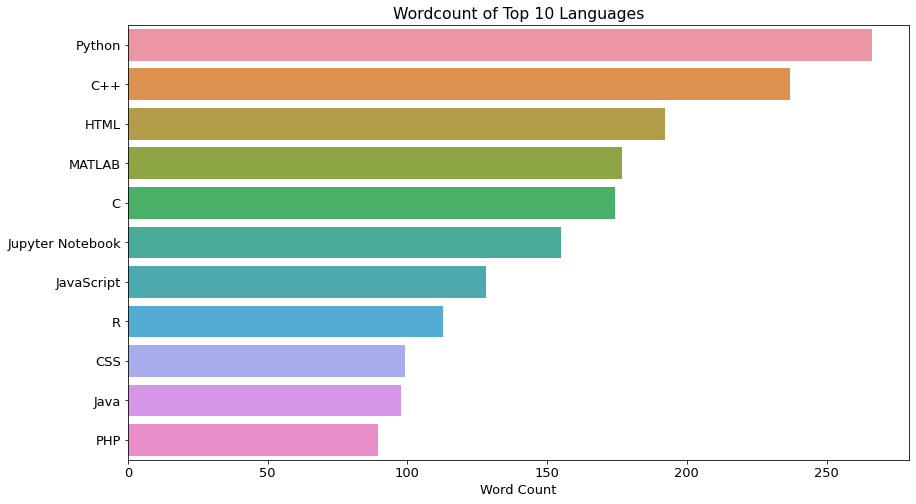

In [273]:
ax = sns.barplot(x=top_lang_wordcount.values, 
                 y=top_lang_wordcount.index)
ax.set(title='Wordcount of Top 10 Languages', xlabel='Word Count', 
      ylabel='')
plt.show()

In [274]:
top_lang_df

,language,category,repo,readme_contents,clean_tokes,clean_stemmed,clean_lemmatized,word_count
0,Python,solar_energy,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,# Machine-Learning-for-Solar-Energy-Prediction...,"[machinelearningforsolarenergyprediction, by, ...",machinelearningforsolarenergypredict adel kuzm...,machinelearningforsolarenergyprediction adele ...,123
1,Python,solar_energy,meltaxa/solariot,# Solariot\n\nLeverage your IoT enabled Solar ...,"[solariot, leverage, your, iot, enabled, solar...",solariot leverag iot enabl solar pv invert str...,solariot leverage iot enabled solar pv inverte...,410
2,Python,solar_energy,renewables-ninja/gsee,[![Master branch build status](https://img.shi...,"[master, branch, build, statushttpsimgshieldsi...",master branch build statushttpsimgshieldsioazu...,master branch build statushttpsimgshieldsioazu...,127
3,C++,solar_energy,3KUdelta/Solar_WiFi_Weather_Station,# Zambretti Forecaster on Solar WiFi Weather S...,"[zambretti, forecaster, on, solar, wifi, weath...",zambretti forecast solar wifi weather station ...,zambretti forecaster solar wifi weather statio...,224
4,R,solar_energy,ropensci/nasapower,\n[![R build status](https://github.com/ropens...,"[r, build, statushttpsgithubcomropenscinasapow...",r build statushttpsgithubcomropenscinasapowerw...,r build statushttpsgithubcomropenscinasapowerw...,402
...,...,...,...,...,...,...,...,...
209,C++,natural_gas,reyhancaba/Natural-Gas-Detector-Circuit-Using-...,# Natural-Gas-Detector-Circuit-Using-An-Arduin...,"[naturalgasdetectorcircuitusinganarduinouno, b...",naturalgasdetectorcircuitusinganarduinouno bu ...,naturalgasdetectorcircuitusinganarduinouno bu ...,62
210,Python,natural_gas,fernandessfae/Evolucao-da-producao-de-gas-natu...,# Projeto DataScience - Evolução da produção d...,"[projeto, datascience, evoluo, da, produo, de,...",projeto datasci evoluo da produo de gs natur p...,projeto datascience evoluo da produo de g natu...,272
211,MATLAB,natural_gas,chaiitanyasangani88/OperationalFlowRateVariation,# OperationalFlowCaseStudy\nA detailed study a...,"[operationalflowcasestudy, a, detailed, study,...",operationalflowcasestudi detail studi oper flo...,operationalflowcasestudy detailed study operat...,109
212,R,natural_gas,jaburney/naturalgastransition,## Coal-to-Natural Gas Transition Impacts Anal...,"[coaltonatural, gas, transition, impacts, anal...",coaltonatur ga transit impact analysi thi repo...,coaltonatural gas transition impact analysis r...,224


In [291]:
documents = df[['repo','language', 'clean_lemmatized']]
documents_top = top_lang_df[['repo','language', 'clean_lemmatized']]
documents_top_4 = top_4_lang_df[['repo','language', 'clean_lemmatized']]
documents_top_4

,repo,language,clean_lemmatized
0,ColasGael/Machine-Learning-for-Solar-Energy-Pr...,Python,machinelearningforsolarenergyprediction adele ...
1,meltaxa/solariot,Python,solariot leverage iot enabled solar pv inverte...
2,renewables-ninja/gsee,Python,master branch build statushttpsimgshieldsioazu...
8,sibyjackgrove/SolarPV-DER-simulation-utility,Python,status expect regular update bug fix utility s...
9,zygmuntz/kaggle-solar,Python,kagglesolar see httpfastmlcompredictingsolaren...
...,...,...,...
204,mariorodeghiero/datopian,JavaScript,div aligncenter pcheck online hrefhttpsmarioro...
206,jamesbews/ENSF-519,Jupyter Notebook,ensf519 ensf 519 natural gas pricing machine l...
207,caoxiaole/Natural-gas-consumption-in-American-...,Jupyter Notebook,naturalgasconsumptioninamericanfamilies using ...
210,fernandessfae/Evolucao-da-producao-de-gas-natu...,Python,projeto datascience evoluo da produo de g natu...


## All

In [410]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents.clean_lemmatized)
y = documents.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        random_state=42, stratify=y, train_size=.7)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# lm = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42)\
#                             .fit(X_train, y_train)
# model = RandomForestClassifier(random_state=42, min_samples_leaf=2,
#                             max_depth=6).fit(X_train, y_train)
model = KNeighborsClassifier().fit(X_train, y_train)

train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

In [411]:
print(classification_report(train.actual, train.predicted))

                  precision    recall  f1-score   support

               C       0.31      0.80      0.44         5
             C++       0.67      0.44      0.53         9
             CSS       0.71      0.71      0.71         7
            HTML       0.27      0.30      0.29        10
            Java       1.00      0.55      0.71        11
      JavaScript       0.73      0.69      0.71        16
Jupyter Notebook       0.65      0.85      0.73        26
          MATLAB       0.00      0.00      0.00         8
             PHP       0.00      0.00      0.00         6
          Python       0.60      0.83      0.70        29
               R       1.00      0.17      0.29         6

        accuracy                           0.60       133
       macro avg       0.54      0.48      0.46       133
    weighted avg       0.59      0.60      0.56       133



/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [412]:
print(classification_report(test.actual, test.predicted))

                  precision    recall  f1-score   support

               C       0.00      0.00      0.00         2
             C++       0.20      0.25      0.22         4
             CSS       0.00      0.00      0.00         3
            HTML       0.00      0.00      0.00         4
            Java       0.33      0.20      0.25         5
      JavaScript       0.29      0.29      0.29         7
Jupyter Notebook       0.25      0.27      0.26        11
          MATLAB       0.00      0.00      0.00         4
             PHP       0.00      0.00      0.00         2
          Python       0.25      0.38      0.30        13
               R       0.00      0.00      0.00         2

        accuracy                           0.21        57
       macro avg       0.12      0.13      0.12        57
    weighted avg       0.18      0.21      0.19        57



## Top 4

In [407]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(documents_top_4.clean_lemmatized)
y = documents_top_4.language

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        stratify=y, train_size=.7, random_state=42)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

# model = LogisticRegression().fit(X_train, y_train)
# model = DecisionTreeClassifier(max_depth=6, random_state=42)\
#                             .fit(X_train, y_train)
# model = RandomForestClassifier(random_state=42,min_samples_leaf=2,
#                             max_depth=6).fit(X_train, y_train)
model = KNeighborsClassifier().fit(X_train, y_train)


train['predicted'] = model.predict(X_train)
test['predicted'] = model.predict(X_test)

In [408]:
print(classification_report(train.actual, train.predicted))

                  precision    recall  f1-score   support

            Java       0.86      0.55      0.67        11
      JavaScript       0.77      0.62      0.69        16
Jupyter Notebook       0.57      0.81      0.67        26
          Python       0.80      0.69      0.74        29

        accuracy                           0.70        82
       macro avg       0.75      0.67      0.69        82
    weighted avg       0.73      0.70      0.70        82



In [409]:
print(classification_report(test.actual, test.predicted))

                  precision    recall  f1-score   support

            Java       1.00      0.40      0.57         5
      JavaScript       1.00      0.71      0.83         7
Jupyter Notebook       0.56      0.82      0.67        11
          Python       0.62      0.62      0.62        13

        accuracy                           0.67        36
       macro avg       0.79      0.64      0.67        36
    weighted avg       0.73      0.67      0.67        36

